Create variables for the paths to the datasets

In [1]:
import os

base_dir = 'dataset'
training_dir = os.path.join(base_dir, 'Train_Alphabet')
test_dir = os.path.join(base_dir, 'Test_Alphabet')

print(os.listdir(training_dir))
print(len(os.listdir(training_dir)))

['Y', 'S', 'V', 'U', 'Q', 'W', 'T', 'Blank', 'R', 'H', 'I', 'N', 'F', 'P', 'M', 'X', 'A', 'D', 'E', 'J', 'K', 'Z', 'B', 'G', 'O', 'C', 'L']
27


Preview a random subset of images

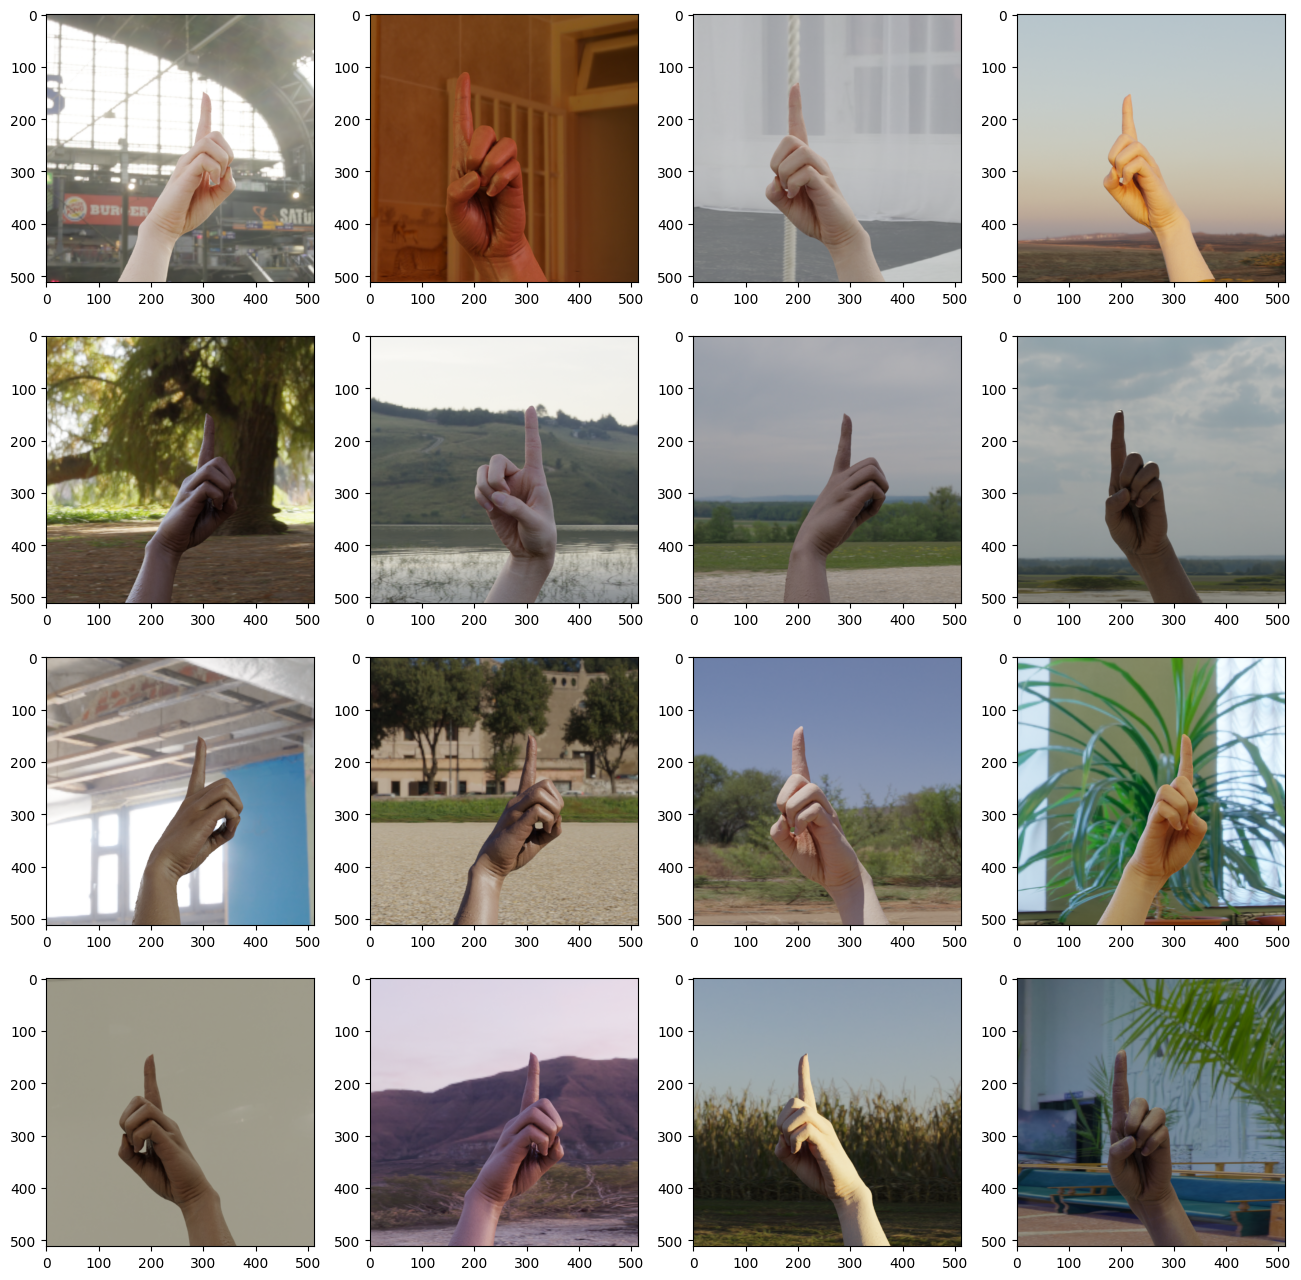

In [12]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#Change this letter to view different pictures of letters
letter = 'D'
letter_dir = os.path.join(training_dir, letter)
letter_file_names = os.listdir(letter_dir)


nrows = 4
ncols = 4
num_pics = int((nrows * ncols))

pic_index = 20

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += num_pics

photos = [os.path.join(letter_dir, file_name) for file_name in letter_file_names[pic_index - num_pics:pic_index]]

for i, img_path in enumerate(photos):
    #Create Subplot, indexed at 1
    subplot = plt.subplot(nrows, ncols, i+1)
    #subplot.axis('Off')
    image = mpimg.imread(img_path)
    plt.imshow(image)
    
plt.show()



Creating the model
-> Assuming images are in uniform size of 200 x 200 pixels
-> Softmax activation used in multiclass identification

In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import scipy
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2022-09-28 00:37:47.344537: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-28 00:37:47.469474: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-28 00:37:47.962643: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/bill/ProgramFiles/miniconda3/envs/tf/lib/
2022-09-28 00:37:47.962742: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerro

Num GPUs Available:  1


In [8]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        #tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(27, activation='softmax')
    ])
    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

Will create training generators:

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0 / 255.)
test_datagen = ImageDataGenerator(rescale = 1.0 / 255. )

#Create the generator that creates batches of 20
batchSize = 20
train_generator = train_datagen.flow_from_directory(training_dir,
                                                   batch_size=batchSize,
                                                   class_mode='categorical',
                                                   target_size=(200,200))
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 batch_size=batchSize,
                                                 class_mode='categorical',
                                                 target_size=(200,200))



Found 24300 images belonging to 27 classes.
Found 2700 images belonging to 27 classes.


Create training process


In [11]:
EPOCHS = 20
model = create_model()
history = model.fit(
    train_generator,
    steps_per_epoch=100, #2000 images = batch_size * steps
    epochs=EPOCHS,
    validation_data=test_generator,
    validation_steps=50, #1000 images = batch_size * steps
    verbose=1
)

Epoch 1/20
100/100 [==============================] - 23s 227ms/step - loss: 3.2821 - accuracy: 0.0595 - val_loss: 3.2289 - val_accuracy: 0.0660
Epoch 2/20
100/100 [==============================] - 23s 226ms/step - loss: 2.8871 - accuracy: 0.2080 - val_loss: 2.3700 - val_accuracy: 0.3560
Epoch 3/20
100/100 [==============================] - 22s 223ms/step - loss: 2.0633 - accuracy: 0.4055 - val_loss: 1.9017 - val_accuracy: 0.4780
Epoch 4/20
100/100 [==============================] - 23s 226ms/step - loss: 1.5053 - accuracy: 0.5575 - val_loss: 1.4305 - val_accuracy: 0.6090
Epoch 5/20
100/100 [==============================] - 23s 226ms/step - loss: 1.2591 - accuracy: 0.6545 - val_loss: 1.1311 - val_accuracy: 0.6740
Epoch 6/20
100/100 [==============================] - 23s 227ms/step - loss: 0.9824 - accuracy: 0.7330 - val_loss: 0.9933 - val_accuracy: 0.7030
Epoch 7/20
100/100 [==============================] - 22s 223ms/step - loss: 0.8130 - accuracy: 0.7830 - val_loss: 0.9179 - val_ac